<a href="https://colab.research.google.com/github/Aravind-Reddy7/ML-Projects/blob/main/Project_8_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#Data Collection & Analysis

In [2]:
df = pd.read_csv('/content/gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
df.shape

(2290, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [19]:
correlation = df.drop('Date', axis=1).corr()

<Axes: >

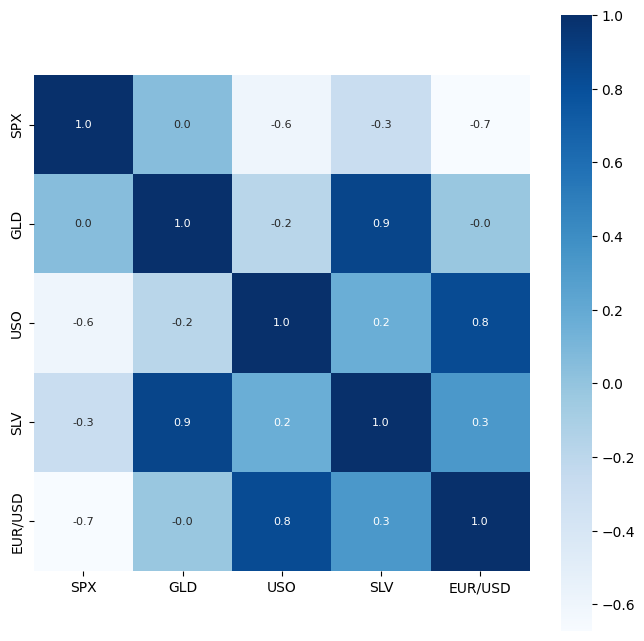

In [20]:
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, annot = True, fmt = '.1f', annot_kws = {'size': 8}, cmap = 'Blues')

In [21]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-187449197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

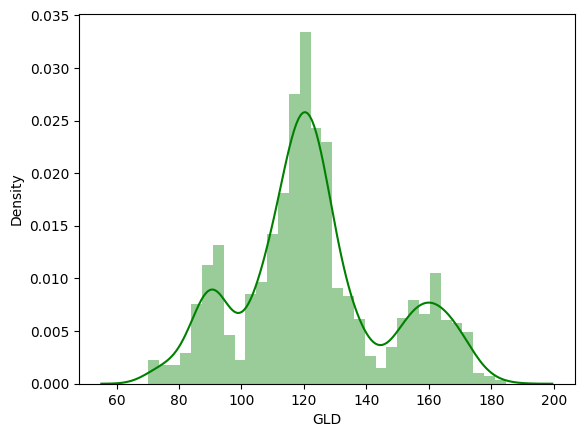

In [26]:
sns.distplot(df['GLD'], color = 'green')

#Data Pre-Processing

In [35]:
X = df.drop(['GLD', 'Date'], axis = 1)

In [36]:
Y = df['GLD']

In [37]:
X.shape

(2290, 4)

In [38]:
Y.shape

(2290,)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 2, test_size = 0.2)

#Model Training

In [40]:
model = RandomForestRegressor(n_estimators=100)

In [41]:
model.fit(X_train, Y_train)

RandomForestRegressor()

#Model Evalutation

In [42]:
X_test_prediction = model.predict(X_test)

In [43]:
print(X_test_prediction)

[168.36969914  81.74659991 115.93960016 127.68440036 120.86470137
 154.57019755 150.29529902 125.98160004 117.4634986  125.85260062
 116.65800121 171.24630126 141.10679863 167.89059802 115.00140001
 117.7943005  137.355004   170.0519004  159.04300228 160.3384995
 155.09069984 125.26099984 175.40199975 156.89090319 125.16530044
  93.86449967  77.57880007 120.9660002  119.0882994  167.41310001
  88.09220077 125.41440001  91.14620072 117.59370038 121.1113987
 135.89500054 115.58610124 115.15870054 147.39410084 107.10910106
 104.19030247  87.21429773 126.46350063 118.04320008 152.70879869
 119.48410002 108.35540014 108.0991982   93.21560037 127.03469808
  74.97030033 113.76189935 121.32250014 111.19379922 118.99409906
 120.81579976 158.76610009 168.05550111 147.04349653  85.96299882
  94.19840021  86.83519904  90.48780007 118.84470078 126.52440016
 127.59439974 168.88140036 122.36239926 117.42539928  98.34829976
 168.58280065 142.97319828 132.223603   121.21360197 120.81599958
 119.5628004

In [45]:
error_score = metrics.r2_score(Y_test, X_test_prediction)

In [47]:
print('R2 squared error :', error_score)

R2 squared error : 0.9891949484641396


#Compare the Actual values with Predicted values

In [50]:
Y_test = list(Y_test)

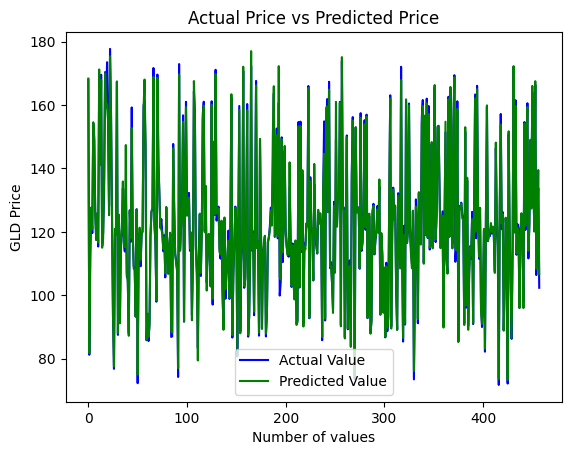

In [51]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(X_test_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

#Making A Predictive System

In [64]:
input = (1447.160034,78.470001,15.18,1.471692)
input = np.asarray(input)
input = input.reshape(1, -1)
prediction = model.predict(input)

print(prediction[0])

84.94550040999998


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
